In [20]:
import numpy as np
import pandas as pd

In [21]:
df = pd.read_csv('CrimesOnWomenData.csv')

In [22]:
df_array = np.array(df)
df_1D = np.array(df.iloc[0])
df_2D = np.array(df.iloc[0:3])
df_3D = np.array(df.iloc[0:3,4])

In [23]:
df1 = pd.DataFrame(df_array,columns=df.columns)
df1

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...,...
731,731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,733,Delhi UT,2021,2,1,0,5,1,9,0
734,734,Lakshadweep,2021,0,0,0,1,1,3,0


In [24]:
df_agg = df.groupby(['Year','State'])[['Rape']].sum()

df_unstack = df_agg.unstack(level='State').fillna('Unknown')
year = df_unstack.index
rape_cases = [ df_unstack['Rape', rape] for rape in df_unstack['Rape'].columns]


In [25]:
year = pd.to_numeric(year, errors='coerce')
rape_cases = pd.to_numeric(rape_cases, errors='coerce')

Year shape: (21,)
Selected rape_cases_transposed shape: (21, 21)


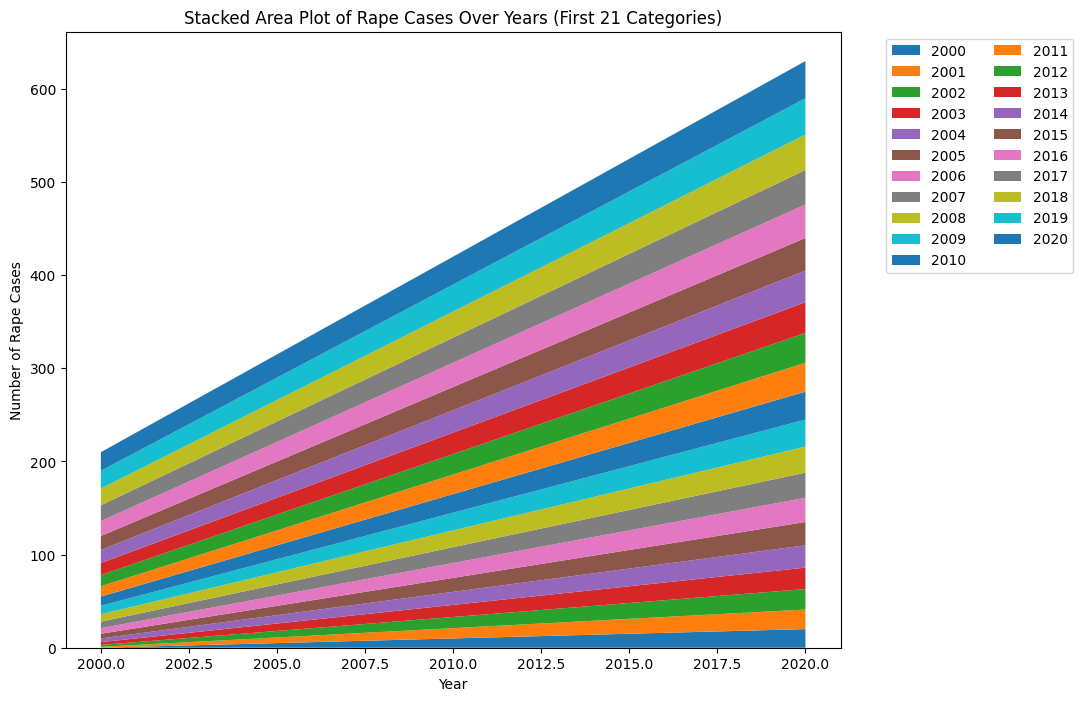

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data setup - replace this with your actual data
year = pd.Series(range(2000, 2021))  # Example year data (21 years)
rape_cases = pd.DataFrame(
    data=[[i + j for j in range(21)] for i in range(70)],  # Example data for 70 categories
    columns=year
)

# Transpose and select only the first 21 categories
rape_cases_transposed = rape_cases.T.iloc[:, :21]

# Check shapes for alignment
print("Year shape:", year.shape)                 # Should be (21,)
print("Selected rape_cases_transposed shape:", rape_cases_transposed.shape)  # Should be (21, 21)

# Plot using stackplot
plt.figure(figsize=(10, 8))
plt.stackplot(year, *rape_cases_transposed.values, labels=rape_cases.columns[:21])
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), ncol=2)  # Adjust legend position if needed
plt.xlabel('Year')
plt.ylabel('Number of Rape Cases')
plt.title('Stacked Area Plot of Rape Cases Over Years (First 21 Categories)')
plt.show()
